<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/08_DesignOfExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Experiments - Tests, color maps and data analysis

In this course, we will learn more about how to plan and perform experimentation on data. Thus, we will propose mathematical models to understand a given problem, and then we will test the statistical significance of a given model. We will then build a color map to help in interpreting data.

During this course, we will use a dataset from a cupcake company, where we will try to understand how the amount of some ingredients used are related to the amount of cupcakes sold. To that end, we used experiments. Thus we will learn how to:

*   Plan the experiment
*   Collect the data
*   Analyse the results



## Understanding our problem

Here, we are worried with one aspect: how does the amount of flour and chocolate affect the number of cupcakes produced? 

To understand this, we need to make experiments: we will make cupcakes with different quantities of flour and chocolate and, then, we will get a good grasp of how much of each ingredient we need to produce a number of cupcakes. Using experiments, we are even able to create a function tell us the number of cupcakes produced using $x_1$ g of flour and $x_2$ g of chocolate.

## Design of Experiments

So, this experiment can be performed using different quantities of each ingredient. Then, we can use statistical methods to draw conclusions. However, how many experiments do we need? And which experiments are we going to perform? 

The number of experiments depends on how difficult it it to produce a single experiment. For instance, let's say here that we will use 4 experiments. Also, note that, when defining experiments, we should only change our interest features. If we change something else, we are not able to define if the change in the target was due to the change in our features or not. 

Thus, to plan an experiment, we need to:

*   Define the desired features and the target.
*   Have a clear goal in mind. We should only change our desired features, and we should only compare these using our defined target.





### Defining our experiments

To define our experiments, we first have to define the parameter range that will be tested. We know that we can't have a negative amount of chocolate. However, we also can't test every possible parameter value (until the infinite). So, we have to defined a parameter range that makes sense to our study. 

This parameter range requires previous knowledge about how data is structured and about previous tests one might have performed before. In some cases, we need to perform a bibliographic review, taking the experience of other people in consideration. After this, we can define that our limits are:

*   Flour: 500 g to 1500 g
*   Chocolate: 100 g to 500 g

Ok. Now, we can define an area (or hypervolume, if we had more dimensions) where we can draw our experiments. However, there are still infinite possibilities for our experiment, since we have continuous values. 

Here, we can consider that these infinite possibilites are our population, and we have to draw sample from this population to make our tests. This is very similar to the ideia of statistical inferences, where we use samples of our population!

And how we define these samples? We should use the lowest number of experiments possible, but this number should also be representative of our population. Also, preferrably, these should be evenly distributed in our design space, so that we can understand how each feature changes our target in the entire space.

Thus, to fill these requirements, we can use different sampling schemes. The most simple scheme is the full factorial scheme. Here, we divide each dimension in equal parts, and use every pair possible as our experiments. However, the full factorial scheme requires a high number of experiments. Alternatively, one may simply employ a factorial scheme, where only the corners of the design space are used as experiments. Thus, in our case, we should consider four experiments:

*   500 g Flour, 100 g Chocolate;
*   1500 g Flour, 100 g Chocolate;
*   500 g Flour, 500 g Chocolate;
*   1500 g Flour, 500 g Chocolate;

Other sampling schemes can be found in:

https://en.wikipedia.org/wiki/Sampling_(statistics)

https://en.wikipedia.org/wiki/Latin_hypercube_sampling

https://en.wikipedia.org/wiki/Low-discrepancy_sequence

Finally, usually, we normalize our data points from an experiment. To do so, we can simply put the variables in the range $[-1, 1]$, considering our previously defined bounds.


Thus, let's define our experiment in Python. For that end, we will use the Pandas and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np

Let's say that we did our four experiments, and got the following results:

*   500 g Flour, 100 g Chocolate (-1, -1): 19 cupcakes;
*   1500 g Flour, 100 g Chocolate (+1, -1): 37 cupcakes;
*   500 g Flour, 500 g Chocolate (-1, +1): 24 cupcakes;
*   1500 g Flour, 500 g Chocolate (+1, +1): 49 cupcakes;

Let's create a table with these results. The creation of a Design of Experiments can be performed in Python using the pyDOE2 library:

In [2]:
!pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=669eb2b07e9a15adea99bbb78d1b1ba150d23446de6afa9e98ee747c8246034b
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [3]:
import pyDOE2 as doe

dim = 2

experiments = doe.ff2n(dim)

In [4]:
experiments

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

Nice! Now, let's store this in a DataFrame:

In [5]:
exper = pd.DataFrame(experiments, columns = ['Flour', 'Chocolate'])
exper

,Flour,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


Now, let's add our results:

In [6]:
exper['Num_Cupcakes'] = [19, 37, 24, 49]
exper

,Flour,Chocolate,Num_Cupcakes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


Great! Now, let's try to visualize our experiments. We are going to do this using the seaborn package:

In [7]:
import seaborn as sns

sns.set_palette('terrain')
sns.set_style('darkgrid')

Let's plot a *lmplot( )* for our experiments:

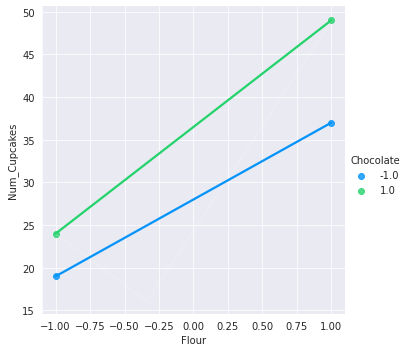

In [8]:
sns.lmplot(data = exper, x = 'Flour', hue = 'Chocolate', y = 'Num_Cupcakes', ci = False)

Note that we have two lines: one for the lower bound of chocolate, and other for the upper bound. Note that the inclination of the line is different. Let's make a similar graph, now for the chocolate:

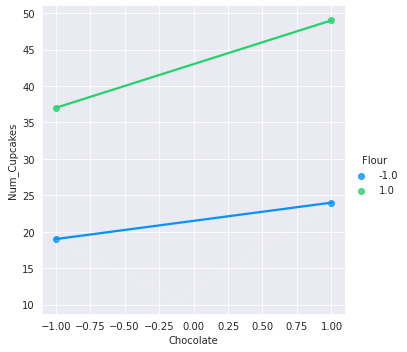

In [9]:
sns.lmplot(data = exper, x = 'Chocolate', hue = 'Flour', y = 'Num_Cupcakes', ci = False)

Note that the inclination of the regression lines is higher when we change flour. We can confirm this hypothesis by creating a model based on our data.

## Creating a model for our data

So, how can we do this model? Note that both the flour and the chocolate have an effect on the number of cupcakes produced. Also, note that there is a change in the inclination of the regression line when we change the amount of chocolate or flour. This means that there is an interation between these variables. Thus, we could build a model in the form:

\begin{equation}
\hat{y} = \beta_0 + \beta_1 \, x_{flour} + \beta_2 \, x_{choc} + \beta_3 \, x_{flour} \, x_{choc}
\end{equation}

Thus, let's create our model using statsmodels:

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here, we will use the OLS method for statsmodels:

In [11]:
model = smf.ols(data = exper, formula = 'Num_Cupcakes ~ Flour + Chocolate + Flour:Chocolate')

In [12]:
result = model.fit( )

Now, let's see the results for our model fitting:

In [13]:
print(result.summary( ))

                            OLS Regression Results                            
Dep. Variable:           Num_Cupcakes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 30 May 2022   Prob (F-statistic):                nan
Time:                        21:42:15   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.2500        nan     

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-

Analyzing the coefficient for each variable, we have a sense of how important that variable is. Here, we see that flour ($\beta_1 = 10.75$) is more important than chocolate ($\beta_2 = 4.25$), which is more important than the interation between the features ($\beta_3 = 1.75$).

Now, let's understand if these coefficients are able to express the behavior of our target. To do this, we need to perfom some tests to analyze our statistical significance. 

# Statistical analyses

To perform an analysis of the statistical significance of our model, we need to use data from our experiment. However, the amount of information we got is limited. 

We did 4 experiments, and our model has 4 parameters ($\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$). Thus, the residuals degrees of freedom is 0. To perform statistical analyses, we need the DOF to be higher than 0. From the summary, we see that, indeed, no statistical analyses over the model coefficients where performed.

Thus, we have two options: increase the number of experiments, or decrease the number of parameters. Here, we will take the former alternative. 

Thus, we will do four new experiments, all in the same point (0, 0), which is related to 1000 g of flour and 300 g of chocolate. Let's say that, in these four experiments, we got the following amount of cupcakes: 29, 30, 29, 30. So, let's make these experiments:

In [14]:
center = np.array([[0, 0, 29],
                   [0, 0, 30],
                   [0, 0, 29],
                   [0, 0, 30]])

In [15]:
center_df = pd.DataFrame(center, columns = ['Flour', 'Chocolate', 'Num_Cupcakes'], index = [4, 5, 6, 7])

In [16]:
exper = exper.append(center_df)
exper

,Flour,Chocolate,Num_Cupcakes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


Nice! Now, let's proceed with the statistical analyses. First, let's fit the model again:

In [17]:
model = smf.ols(data = exper, formula = 'Num_Cupcakes ~ Flour + Chocolate + Flour:Chocolate')
result = model.fit( )

Taking the summary once again:

In [18]:
print(result.summary( ))

                            OLS Regression Results                            
Dep. Variable:           Num_Cupcakes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00152
Time:                        21:42:15   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.8750      0.710     

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


We see that we now have 4 residuals degrees of freedom. Now, we can look to the p-value, which shows $P > |t|$. Considering a significance of 5%, we can say that parameters $\beta_0$, $\beta_1$, and $\beta_2$ are significant. Thus, we parameter $\beta_3$, related to the interaction between flour and chocolate, is not statistically significant.

We can also reach for the same conclusion by analyzing the t-distribution, seeing the threshold for $t$ which is related to the significance of 5%. We can find the value by:

In [19]:
from scipy.stats import t as t_student

In [20]:
significance = 0.05
dof = result.df_resid

t_alpha = t_student.ppf(1 - significance/2, dof)
t_alpha

2.7764451051977987

Now, let's get the values for $t$ for each coefficient:

In [21]:
t_values = result.tvalues
t_values

Intercept          43.494275
Flour              10.708252
Chocolate           4.233495
Flour:Chocolate     1.743204
dtype: float64

Let's store the name of the parameters in a python list:

In [22]:
name = t_values.index.tolist( )
name

['Intercept', 'Flour', 'Chocolate', 'Flour:Chocolate']

Finally, let's plot a graph to improve our visualization:

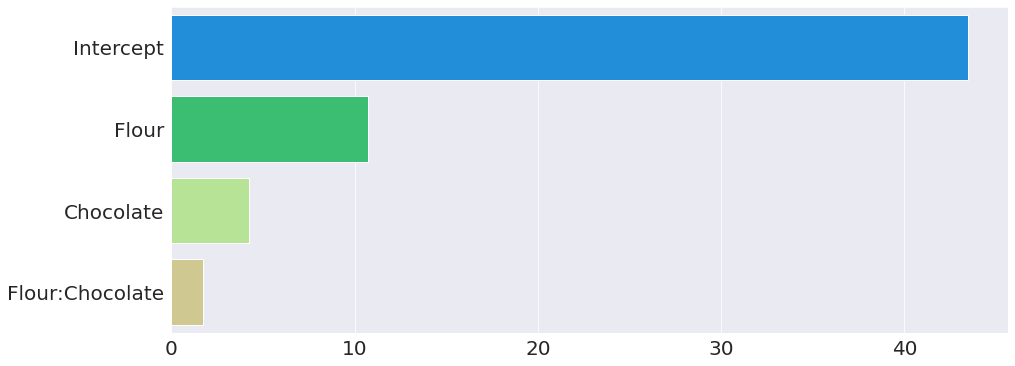

In [23]:
pareto = sns.barplot(x = t_values, y = name)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)

Now, we can add the threshold $t_\alpha$ to the graph:

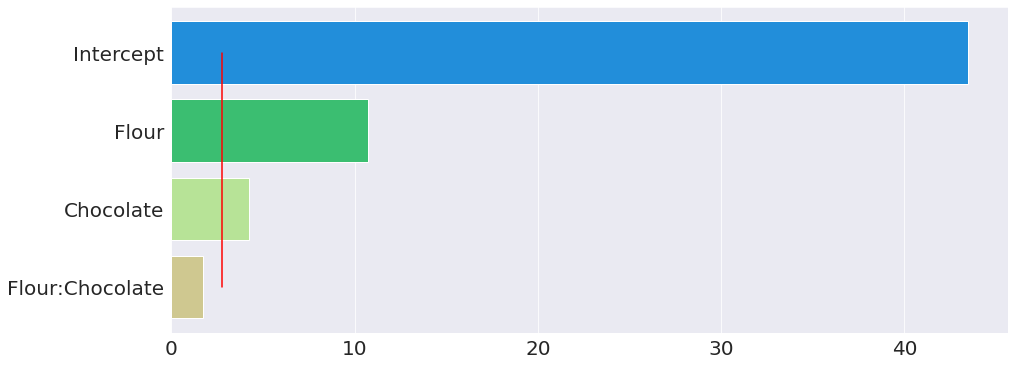

In [24]:
threshold = [t_alpha]*len(name)

pareto = sns.barplot(x = t_values, y = name)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)
pareto.plot(threshold, name, 'r')

Here, we see more clearly that, indeed, the only parameter that has $t < t_\alpha$ is the one related to the interaction between flour and chocolate.

# Creating a new model

Ok, we understood that the interaction between flour and chocolate has very little effect in the amount of cupcakes produced. Thus, let's build a new model using only the statistical significative parameters:

In [25]:
model = smf.ols(data = exper, formula = 'Num_Cupcakes ~ Flour + Chocolate')
result = model.fit( )

In [26]:
print(result.summary( ))

                            OLS Regression Results                            
Dep. Variable:           Num_Cupcakes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 30 May 2022   Prob (F-statistic):           0.000571
Time:                        21:42:15   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


We see that now we have less residual dofs, since we have less parameters. Also, now, all of our parameters present a p-value lower than 5%. Drawing our bar plot once again:

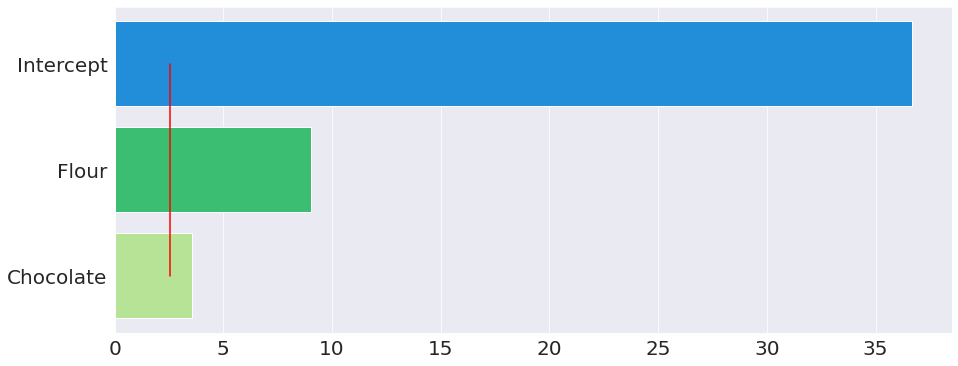

In [27]:
significance = 0.05
dof = result.df_resid

t_alpha = t_student.ppf(1 - significance/2, dof)

t_values = result.tvalues
name = t_values.index.tolist( )

threshold = [t_alpha]*len(name)

pareto = sns.barplot(x = t_values, y = name)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)
pareto.plot(threshold, name, 'r')

Again, all parameters show a $t$ values higher than the threshold for $\alpha = 0.95$.

## Using our new model to generate predictions

Now that we built a model, we can now use it to predict values. First, let's compare the model prediction with the observed values. For that end, we will consider the same conditions as the ones considered for our experiment, and we will check the model response in theses data points.

In [29]:
true = exper.Num_Cupcakes
true

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Num_Cupcakes, dtype: int64

In [30]:
pred = result.predict( )
pred

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

Now, let's perform a graphical comparison.

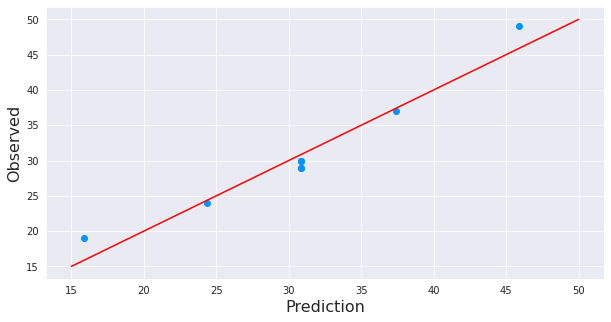

In [35]:
import matplotlib.pyplot as plt

y_guide = np.linspace(15, 50, 2)

plt.figure(figsize = (10, 5))

plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observed', fontsize = 16)

plt.plot(y_guide, y_guide, 'r')

plt.scatter(pred, true)



Nice! It seems that our predictions are very close to the true responses. We can also have a sense of this when we look to the $R^2$, which, in our model, is:

In [37]:
result.rsquared.round(2)

0.95

Since the $R^2$ is very close to 1.0 ($R^2 = 0.95$), our model fits the training data very well!

# Exploring our model

After we build our model, we can now use it to obtain information in conditions that differ from the ones we first experimented. To do so, let's create a user defined function to perform and show the model prediction:

In [53]:
def model_pred(x_f, x_c):

  bounds_norm = [-1, +1]
  bounds_f = [0.5, 1.5]
  bounds_c = [0.1, 0.5]

  x_fn = np.interp(x_f, bounds_f, bounds_norm)
  x_cn = np.interp(x_c, bounds_c, bounds_norm)

  #X   = [1, x_fn, x_cn]
  X = {"Flour" : x_fn, "Chocolate" : x_cn}
  y_h = result.predict(X)
  
  return y_h[0].round(0)

So, let's say we want to see how many cupcakes we would be able to cook using 1000 g of flour and 150 g of chocolate:

In [54]:
y_pred = model_pred(0.5, 0.1)

print(f"Number of Cupcakes (Prediction): {y_pred}")

Number of Cupcakes (Prediction): 16.0


Great! Now, let's try to get predictions in the entire design space! For that end, we can do:

In [55]:
X_flour = np.linspace(0.5, 1.5, 11)
X_chocolate = np.linspace(0.1, 0.5, 11)

res = []

for i in range(len(X_flour)):
  temp = []
  for j in range(len(X_chocolate)):
    Xf = X_flour[i]
    Xc = X_chocolate[j]
    yp = model_pred(Xf, Xc)
    temp.append(yp)
  res.append(temp)
res

[[16.0, 17.0, 18.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 24.0],
 [18.0, 19.0, 20.0, 21.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0],
 [20.0, 21.0, 22.0, 23.0, 24.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0],
 [22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 27.0, 28.0, 29.0, 30.0, 31.0],
 [24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 30.0, 31.0, 32.0, 33.0],
 [27.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0],
 [29.0, 30.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 36.0, 37.0],
 [31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 39.0],
 [33.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0],
 [35.0, 36.0, 37.0, 38.0, 39.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0],
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 42.0, 43.0, 44.0, 45.0, 46.0]]

Nice! Now, let's try to build a color map:

https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

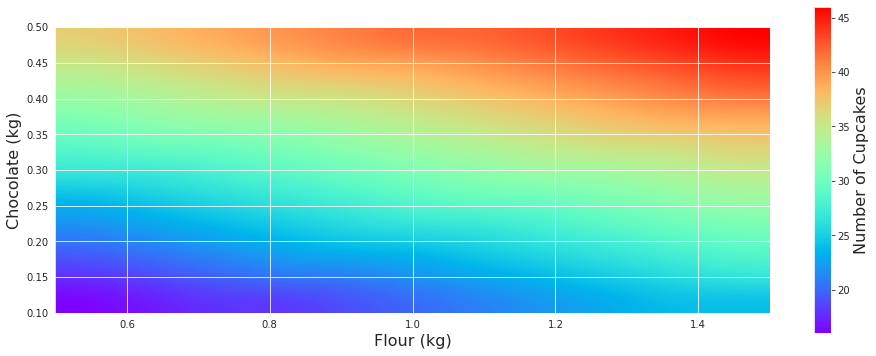

In [58]:
import matplotlib.cm as cm

plt.figure(figsize = (16, 6))

plt.xlabel('Flour (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

map_color = plt.imshow(res, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5, 1.5, 0.1, 0.5))
plt.colorbar( ).set_label('Number of Cupcakes', fontsize = 16)

Nice! We have built our colormap. To improve our visualization, let's add isolines to our colormap:

<a list of 7 text.Text objects>

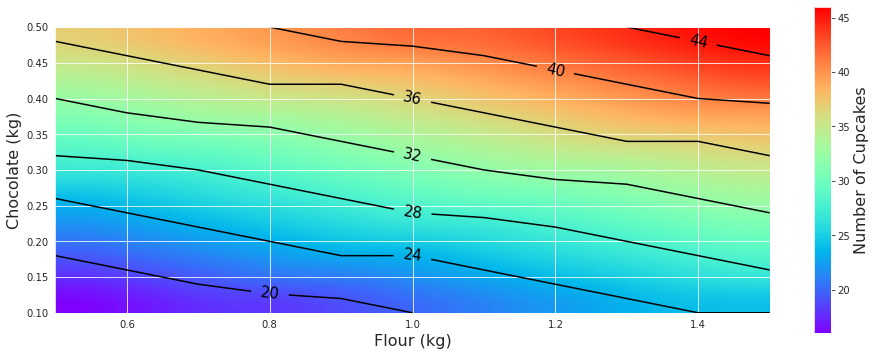

In [61]:
import matplotlib.cm as cm

plt.figure(figsize = (16, 6))

plt.xlabel('Flour (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

map_color = plt.imshow(res, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5, 1.5, 0.1, 0.5))
plt.colorbar( ).set_label('Number of Cupcakes', fontsize = 16)

isolines = plt.contour(X_flour, X_chocolate, res, colors = 'black', linewidths = 1.5)
plt.clabel(isolines, inline = True, fmt = '%1.0f', fontsize = 15, inline_spacing = 10)

Nice! These lines represent regions where the number of cupcakes produced is the same!